# Лабораторная работа 2. Линейная регрессия. Градиентный спуск

Вспомним нормальное уравнение:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}X^T\overrightarrow{y}.$$

Здесь присутствует обращение матрицы $X^TX$ – довольно трудоёмкая операция при большом количестве признаков: сложность вычислений $O(d^3)$. При решении реальных задач такая трудоёмкость часто оказывается непозволительной, поэтому параметры модели (весовые коэффициенты) ищут итерационными методами, стоимость которых меньше. Один из них – *градиентный спуск* (gradient descent – ['greɪdɪənt dɪ'sent]).

Напомним, что в градиентном спуске значения параметров на следующем шаге получаются из значений параметров на текущем шаге смещением в сторону антиградиента функционала ошибки: 

$$\overrightarrow{w}^{(k+1)} = \overrightarrow{w}^{(k)} - \eta_k \nabla Q(\overrightarrow{w}^{(k)}),$$
где $\eta_k$ – шаг градиентного спуска.

Формула градиента функционала ошибки выглядит следующим образом:

$$\nabla Q(\overrightarrow{w}) = \nabla_\overrightarrow{w}\left(\frac{1}{l}\|X\overrightarrow{w}-\overrightarrow{y}\|^2\right) = \frac{2}{l}X^T(X\overrightarrow{w} - \overrightarrow{y}).$$
 
Сложность вычислений в данном случае $O(dl)$.

**Задание 1. Реализация градиентного спуска**  

Напишите функцию `gradient_descent`, которая находит вектор весов на основе градиентного спуска.  

В качестве критериев остановки можно использовать максимальное количество шагов и/или количество шагов, при котором отсутствуют значимые изменения весов.

Проверьте работу функции на простом примере из лекций:

$$x_1=2, x_2=3, x_3=5,$$

$$y_1=1, y_2=3, y_3=4.$$

Нарисуйте исходные данные и полученную линию регресии при помощи ``matplotlib``: для рисования точек используйте ``plt.scatter``, для рисования линии – ``plt.plot``.  

Сравните полученные результаты с результатами, полученными на основе нормального уравнения.

In [347]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as sla
from numpy.linalg import multi_dot

In [348]:
def add_ones(X):
    ones = np.ones((X.shape[0], 1))
    return np.concatenate((ones, X), axis = 1)

def get_weights_using_normal_equation(X, y):
    X = add_ones(X)
    X_transposed = np.transpose(X)

    w = multi_dot([sla.inv(np.dot(X_transposed, X)), X_transposed, y])
    return w

def get_weights_using_gradient_descent(X, y):
    X = add_ones(X)
    print(f"X:\n{X}")
    X_transposed = np.transpose(X)
    print(f"X_transposed:\n{X_transposed}")
    
    objects_count = X.shape[0]
    n_features = X.shape[1]
    w_0 = np.random.random(n_features)
    print(f"w_0:\n{w_0}")
    
    num_steps = 100000
    step_size = 1e-2
    epsilon = 1e-5

    w = w_0.copy()
    w_history = [w.copy()]
    
    for i in range(num_steps):
        w -= step_size * 2 * np.dot(X_transposed, np.dot(X, w) - y) / objects_count
        w_history.append(w.copy())
        if np.linalg.norm(w_history[-1] - w_history[-2]) < epsilon:
            break
    
    return w, np.array(w_history)

X = np.array([[2],
              [3],
              [5]])
y = np.array([1, 3, 4])

w_normal_equation = get_weights_using_normal_equation(X, y)
w_gradient_descent, w_history = get_weights_using_gradient_descent(X, y)
print(f"w using normal equation:\n{w_normal_equation}")
print(f"w using gradient descent:\n{w_gradient_descent}")
print("history of gradient descent method:")
w_history

X:
[[1. 2.]
 [1. 3.]
 [1. 5.]]
X_transposed:
[[1. 1. 1.]
 [2. 3. 5.]]
w_0:
[0.1797664  0.65555335]
w using normal equation:
[-0.42857143  0.92857143]
w using gradient descent:
[-0.42437891  0.92745805]
history of gradient descent method:


array([[ 0.1797664 ,  0.65555335],
       [ 0.18580085,  0.68416208],
       [ 0.18980736,  0.70512096],
       ...,
       [-0.4243596 ,  0.92745292],
       [-0.42436927,  0.92745548],
       [-0.42437891,  0.92745805]])

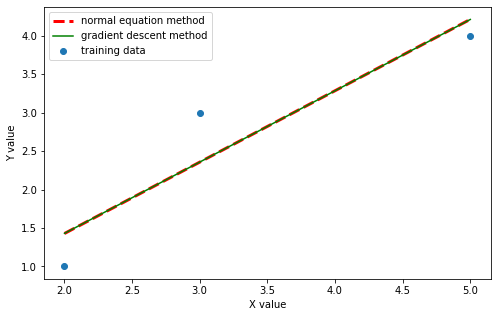

In [349]:
y_predict_normal_equation = lambda x : np.dot(add_ones(x), w_normal_equation)
y_predict_gradient_descent = lambda x : np.dot(add_ones(x), w_gradient_descent)

plt.figure(figsize=(8, 5))
plt.plot(X, y_predict_normal_equation(X), label='normal equation method', color='red', linestyle='--', linewidth=3)
plt.plot(X, y_predict_gradient_descent(X), label='gradient descent method', color='green')
plt.scatter(X, y, label='training data')
plt.legend(['normal equation method', 'gradient descent method', 'training data'])
plt.xlabel('X value')
plt.ylabel('Y value')

plt.show()

**Задание 2. Исследование скорости спуска**  

Протестируйте функцию `gradient_descent` на наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` для разных значений скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.  

Оцените количество шагов для получения решения в каждом случае.

In [350]:
# Ваш код здесь

**Задание 3. Стохастический градиентный спуск**  

Стохастический градиентный спуск отличается от обычного заменой градиента на его оценку по одному или нескольким объектам. В этом случае сложность становится $O(kd)$, где $k$ – количество объектов, по которым оценивается градиент, $k<<l$. Это отчасти объясняет популярность стохастических методов оптимизации.  

Реализуйте функцию `stochastic_gradient_descent`, которая находит вектор весов на основе стохастического градиентного спуска (вычисление градиента на одном случайном примере).  

На наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` оцените количество шагов для получения решения при разных значениях скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.

In [351]:
# Ваш код здесь

**Задание 4. Градиентный спуск по мини-батчам**  

Реализуйте функцию `mini_batch_gradient_descent`, которая находит вектор весов на основе градиентного спуска по мини-батчам (вычисление градиента на подмножестве случайно выбранных примеров). Размер мини-батча должен быть параметром функции.  

На наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` оцените количество шагов для получения решения при разных значениях скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.

In [352]:
# Ваш код здесь